In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.arima_process as arima_process

# Create a process and take a sample

In [26]:
process = arima_process.ArmaProcess(ar=[1, -0.8], ma=[1])

In [27]:
process

ArmaProcess([1.0, -0.8], [1.0], nobs=100) at 0x3197e38e0

In [28]:
z = process.generate_sample(nsample=100)
z

array([ 7.67934013e-01,  1.06493360e+00,  1.73647637e+00,  9.56376109e-01,
        9.34342266e-01, -1.17678353e+00,  4.65745190e-01, -1.12390316e+00,
       -1.67380429e+00, -1.98764622e+00, -1.98518844e+00, -1.31217361e+00,
       -1.78258625e+00, -1.04845633e+00, -3.14496405e+00, -1.20161249e+00,
       -1.94481662e+00, -1.64860240e+00, -5.67244871e-01, -9.87814030e-01,
       -2.28653859e-01,  3.60061528e-01, -1.36209688e+00, -9.07157910e-01,
       -4.73636693e-01, -8.04882627e-01, -9.67697386e-01, -1.47071359e+00,
        1.23562645e+00,  8.23547334e-02,  9.40486461e-01,  1.05307034e+00,
       -2.34726596e-01, -5.62544523e-02,  1.23494466e-02, -2.00315554e-01,
       -1.29697517e+00, -2.40713544e+00, -8.11777331e-01, -1.04816408e+00,
       -1.77481345e+00, -1.00473238e+00, -1.01655481e+00, -5.37005030e-01,
       -7.63611654e-01,  3.88035976e-01,  2.80546936e-01, -1.00590800e-01,
       -3.50670548e-01, -8.18374916e-01, -1.35137461e+00, -4.32605479e-01,
        1.06177266e+00,  

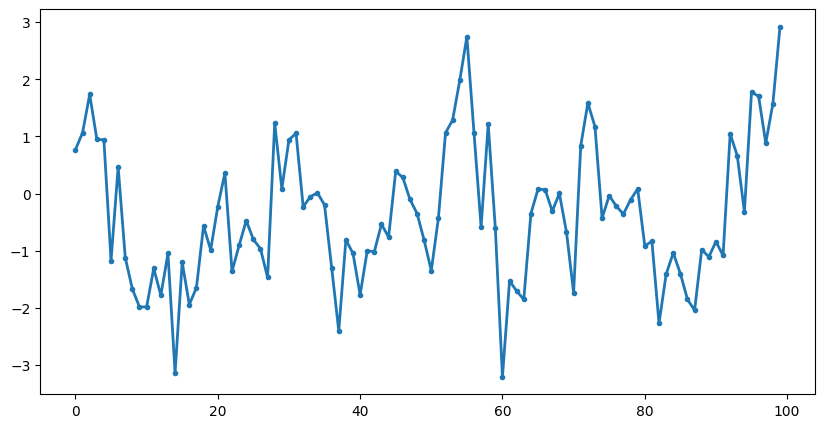

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(z, linewidth=2, marker='.')

# Compute autocorrelations

In [30]:
acf = process.acf(lags=20)
acf

array([1.        , 0.8       , 0.64      , 0.512     , 0.4096    ,
       0.32768   , 0.262144  , 0.2097152 , 0.16777216, 0.13421773,
       0.10737418, 0.08589935, 0.06871948, 0.05497558, 0.04398047,
       0.03518437, 0.0281475 , 0.022518  , 0.0180144 , 0.01441152])

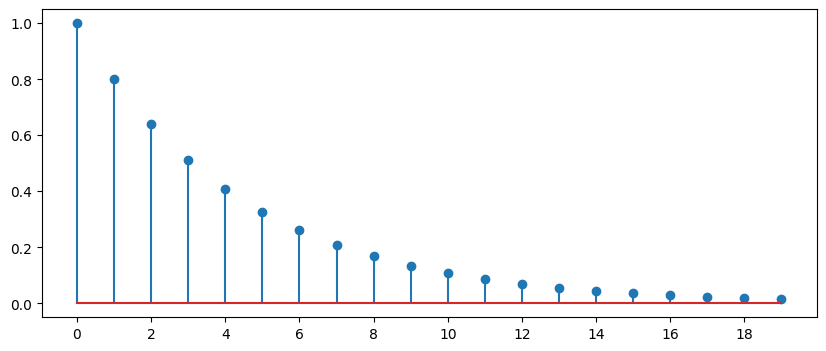

In [31]:
plt.figure(figsize=(10, 4))
plt.stem(acf)
plt.xticks(ticks=range(0, 20, 2))
plt.show()

# Plotting sample autocorrelations

In [32]:
import statsmodels.graphics.tsaplots as tsaplots

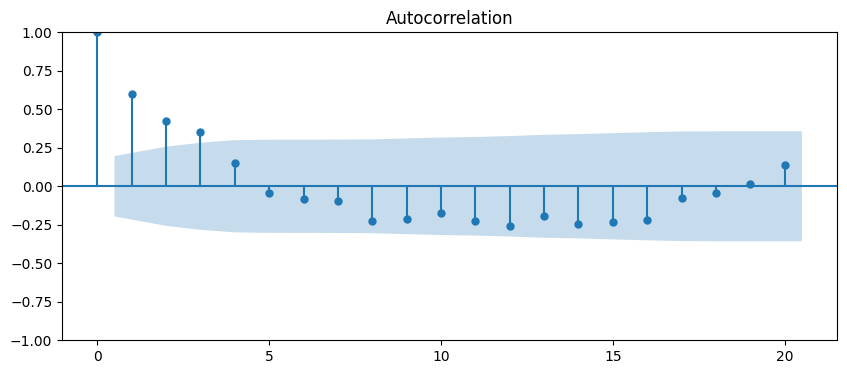

In [33]:
fig, ax = plt.subplots(figsize=(10, 4))
tsaplots.plot_acf(z, lags=20, ax=ax)
plt.show()

# Sunspots data

In [34]:
sunspots = pd.read_csv('data/Sunspots.csv')
sunspots.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [35]:
pd.to_datetime(sunspots.loc[0, 'Date'])

Timestamp('1749-01-31 00:00:00')

In [36]:
sunspots = sunspots.set_index(
    pd.to_datetime(sunspots['Date'])
).drop(
    columns=['Unnamed: 0', 'Date']
).rename(
    columns={'Monthly Mean Total Sunspot Number': 'values'}
)
sunspots.head()

,values
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


<Axes: xlabel='Date'>

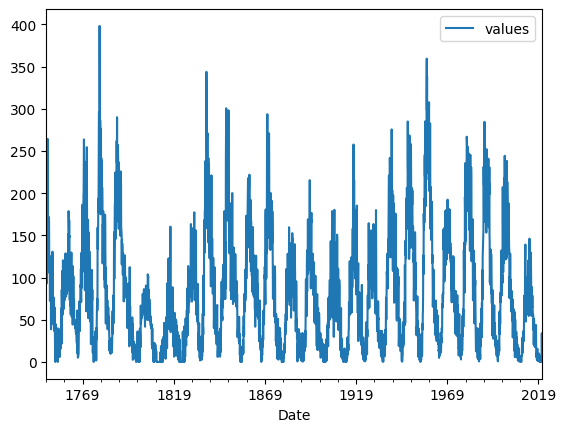

In [37]:
sunspots.plot()

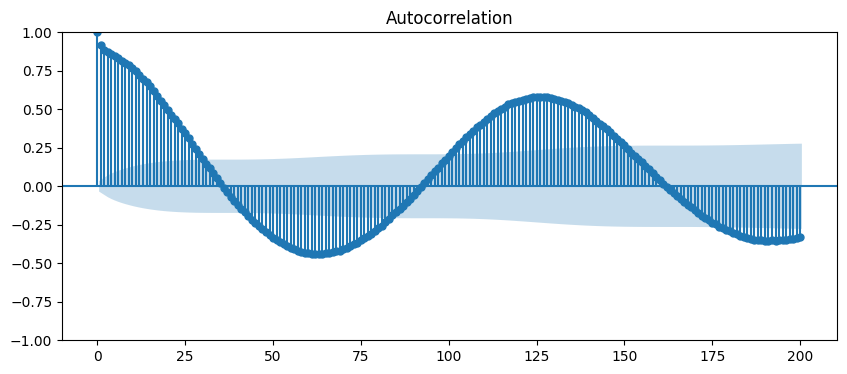

In [40]:
fig, ax = plt.subplots(figsize=(10, 4))
tsaplots.plot_acf(sunspots, lags=200, ax=ax)
plt.show()

The sinusoidal shape indicates this is not stationary. Stationary functions' autocorrelations decay steadily to 0

In [43]:
diff_sunspots = sunspots.diff().dropna()

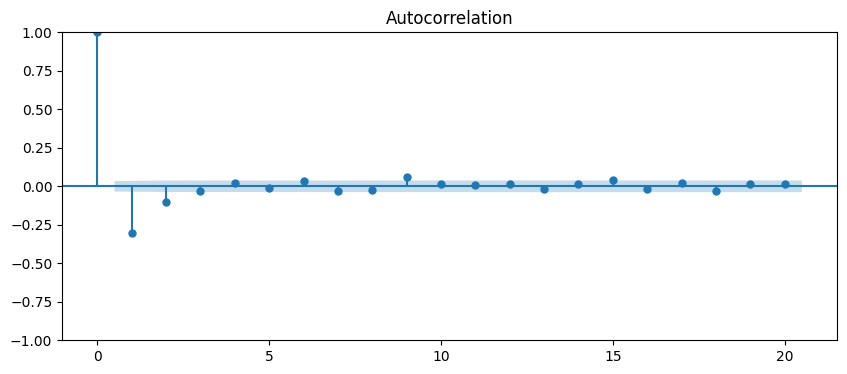

In [46]:
fig, ax = plt.subplots(figsize=(10, 4))
tsaplots.plot_acf(diff_sunspots, lags=20, ax=ax)
plt.show()

# Decomposing the time series data

In [59]:
from statsmodels.tsa.seasonal import _extrapolate_trend
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsaplots

sunspots.head()

,values
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


<Axes: xlabel='Date'>

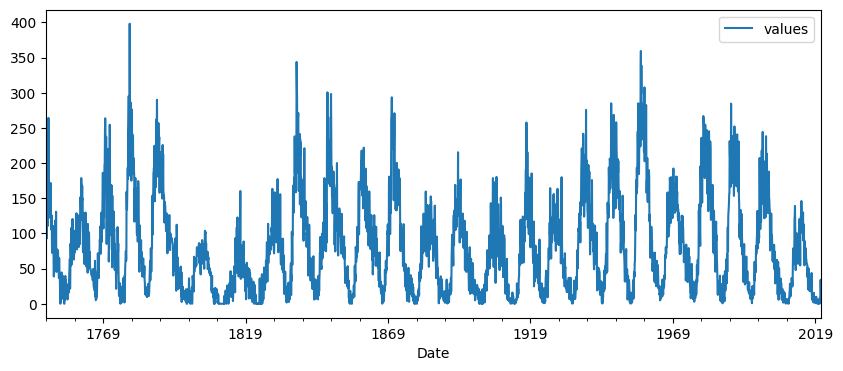

In [50]:
sunspots.plot(figsize=(10, 4))

In [51]:
y_hist = sunspots.loc['1900':'1984', 'values']
y_future = sunspots.loc['1985':'2000', 'values']

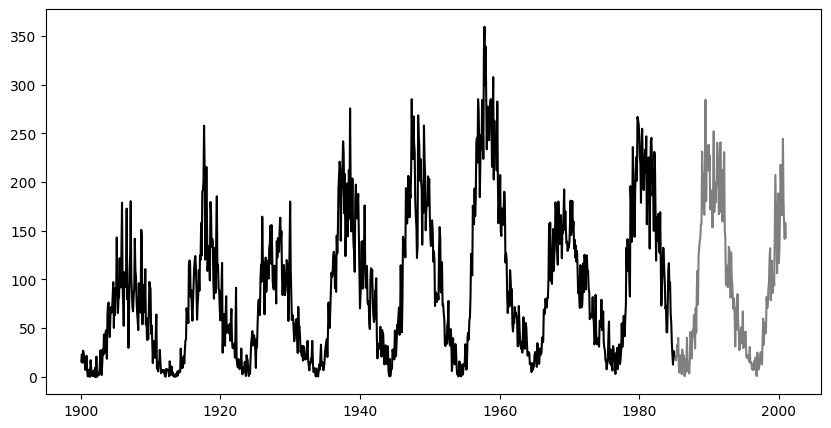

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(y_hist, 'k')
plt.plot(y_future, 'k', alpha=0.5)

## Extract the trend

In [57]:
period = 128

filt = np.ones(period + 1)
filt[0] = 0.5
filt[-1] = 0.5
filt /= period

sum(filt)

1.0

In [62]:
trend = convolution_filter(y_hist, filt)
trend = _extrapolate_trend(trend, period + 1)

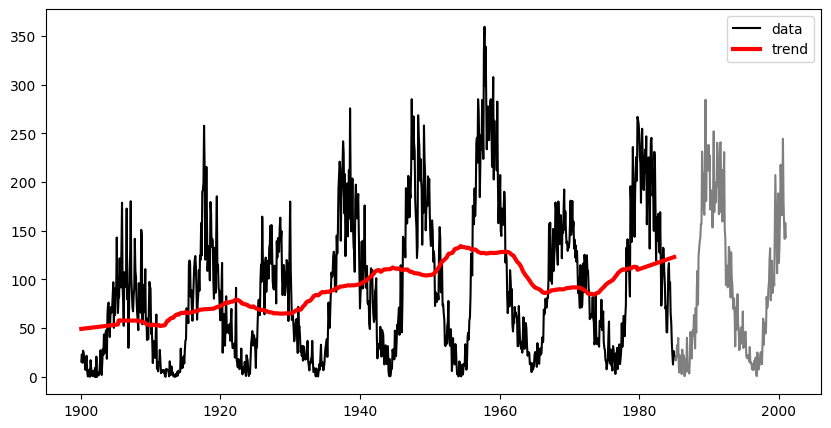

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(y_hist, 'k', label='data')
plt.plot(trend, 'r', linewidth=3, label='trend')
plt.plot(y_future, 'k', alpha=0.5)
plt.legend()

## Detrending the data

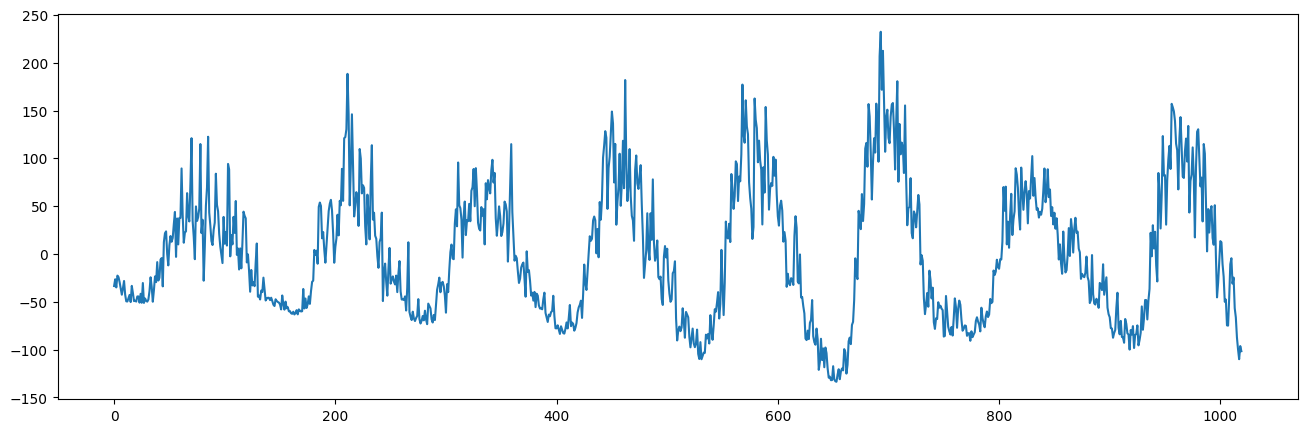

In [69]:
detrended = y_hist - trend
detrended = detrended.to_numpy()

plt.figure(figsize=(16, 5))
plt.plot(detrended)

## Split into seasons

In [70]:
lows_index = [20, 155, 284, 405, 529, 650, 775, 917]
lows = y_hist.index[lows_index]
lows

DatetimeIndex(['1901-09-30', '1912-12-31', '1923-09-30', '1933-10-31',
               '1944-02-29', '1954-03-31', '1964-08-31', '1976-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

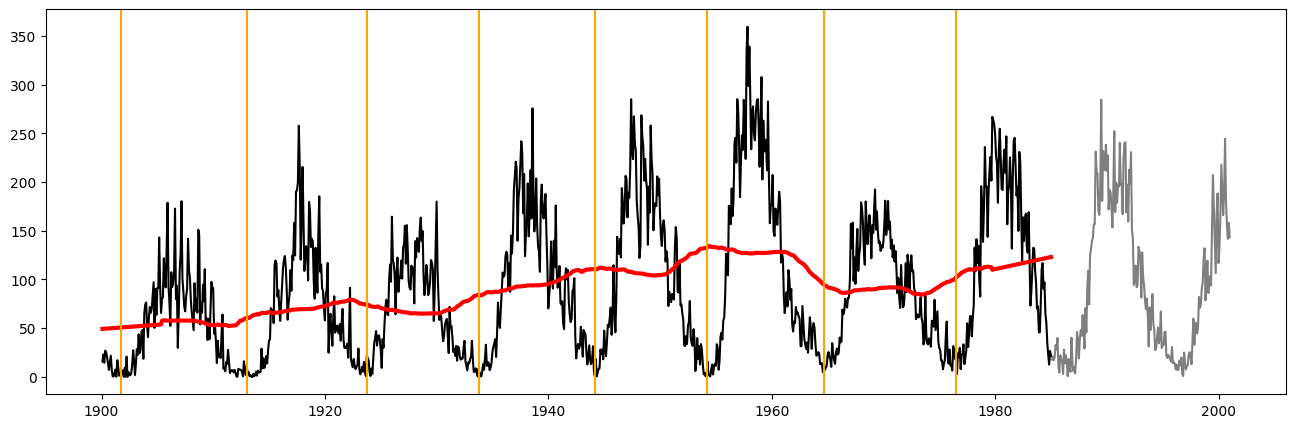

In [71]:
plt.figure(figsize=(16, 5))
plt.plot(y_hist, 'k')
plt.plot(y_future, 'k', alpha=0.5)
plt.plot(trend, 'r', linewidth=3)
for low in lows:
    plt.axvline(x=pd.to_datetime(low), color='orange')

In [73]:
period = int(np.round(np.mean(np.diff(lows_index))))
period

128

In [74]:
num_seasons = len(lows) - 1
num_seasons

7

In [84]:
seasonals = np.empty((period, num_seasons))
for p in range(num_seasons):
    s = detrended[lows_index[p]:lows_index[p] + period]
    # normalize the data and multiple by 2
    s = 2 * (s - np.min(s)) / (np.max(s) - np.min(s))
    seasonals[:, p] = s

mean_seasonals = seasonals.mean(axis=1)

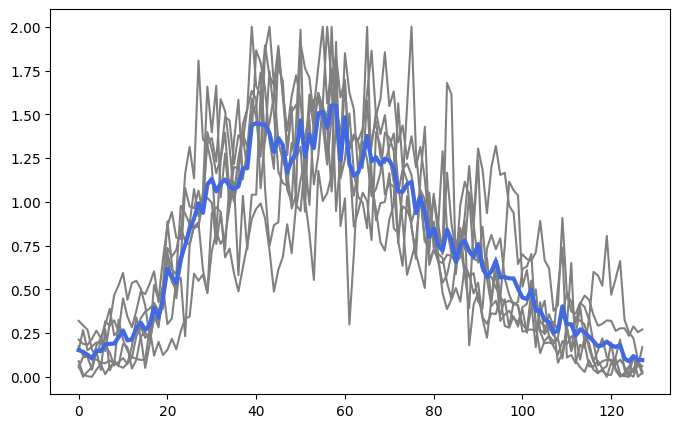

In [85]:
plt.figure(figsize=(8, 5))
for p in range(num_seasons):
    plt.plot(seasonals[:, p], color=0.5 * np.ones(3))

plt.plot(mean_seasonals, color='royalblue', linewidth=3)

## Smooth seasonal data

In [86]:
filt_size = 9
filt = np.repeat(1.0 / filt_size, filt_size)

seasonals = np.empty((period, num_seasons))
for p in range(num_seasons):
    s = detrended[lows_index[p]:lows_index[p] + period]
    s = convolution_filter(s, filt)
    s = _extrapolate_trend(s, filt_size)
    s = 2 * (s - np.min(s)) / (np.max(s) - np.min(s))
    seasonals[:, p] = s

mean_seasonals = seasonals.mean(axis=1)

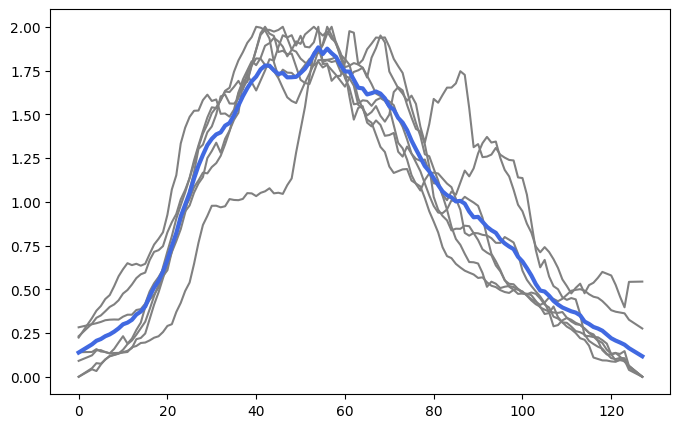

In [87]:
plt.figure(figsize=(8, 5))
for p in range(num_seasons):
    plt.plot(seasonals[:, p], color=0.5 * np.ones(3))
plt.plot(mean_seasonals, color='royalblue', linewidth=3)

## Remove outliers

In [88]:
seasonals = seasonals[:, [2, 3, 4]]
mean_seasonals = seasonals.mean(axis=1)

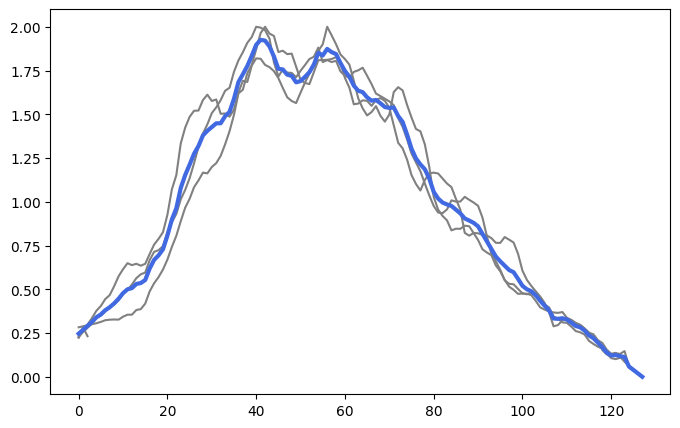

In [89]:
plt.figure(figsize=(8, 5))
plt.plot(seasonals[0], color=0.5 * np.ones(3), label='historical data')
plt.plot(seasonals, color=0.5 * np.ones(3))
plt.plot(mean_seasonals, color='royalblue', linewidth=3)

## Build the seasonal template

In [90]:
seasonal = pd.Series(index=y_hist.index, data=0)

for low in lows_index:
    if low + period < len(seasonal):
        seasonal[low:low + period] = mean_seasonals
    else:
        seasonal[low:] = mean_seasonals[:len(seasonal) - (low+period)]

seasonal = seasonal / np.max(seasonal)

/var/folders/pj/11qfqzjd35366f_6l7_svvj40000gp/T/ipykernel_14920/3373005565.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.24620349 0.26853927 0.29087505 0.31321083 0.34014414 0.35614999
 0.38053114 0.39741948 0.41944029 0.4460398  0.47785817 0.49979882
 0.50662559 0.5303727  0.53565012 0.55300269 0.61861999 0.66794047
 0.6936033  0.72838157 0.80705687 0.89853681 0.96228604 1.07831299
 1.15245891 1.21208134 1.27448305 1.31884656 1.37898779 1.40565121
 1.42705384 1.44832909 1.44858136 1.4890794  1.51371231 1.58887083
 1.683962   1.72880856 1.7757669  1.83395889 1.89690793 1.92541283
 1.92089404 1.88764137 1.83035741 1.75954011 1.75615277 1.72620632
 1.71970861 1.68268565 1.68970326 1.71383319 1.74053887 1.78435331
 1.8508981  1.83612554 1.87352575 1.85526077 1.84399693 1.79262803
 1.74763976 1.71470812 1.66375684 1.63443279 1.62650737 1.59661514
 1.57777324 1.58178747 1.56274994 1.5412084  1.53648

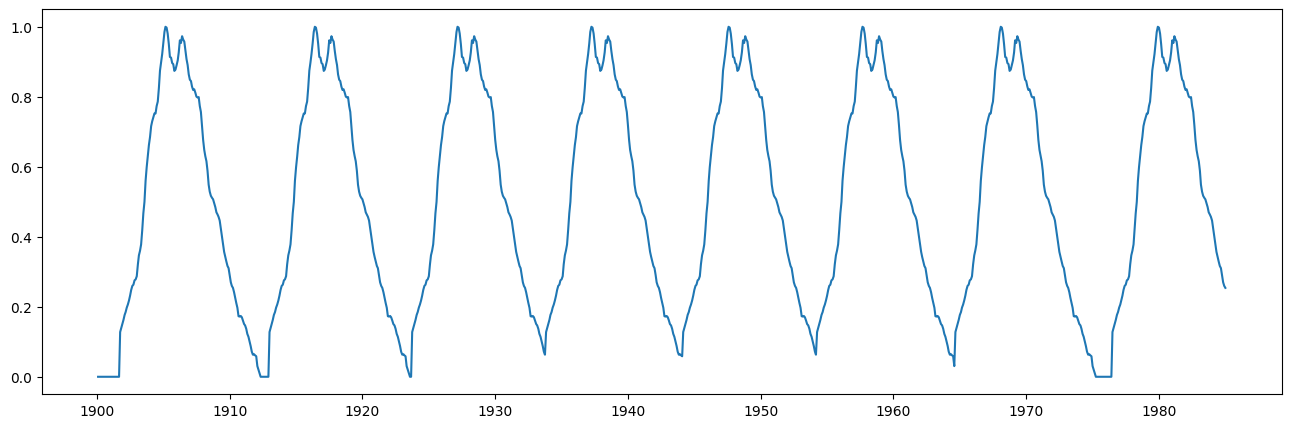

In [91]:
plt.figure(figsize=(16, 5))
plt.plot(seasonal)

## Final model

In [92]:
season_and_trend = 2*trend*seasonal

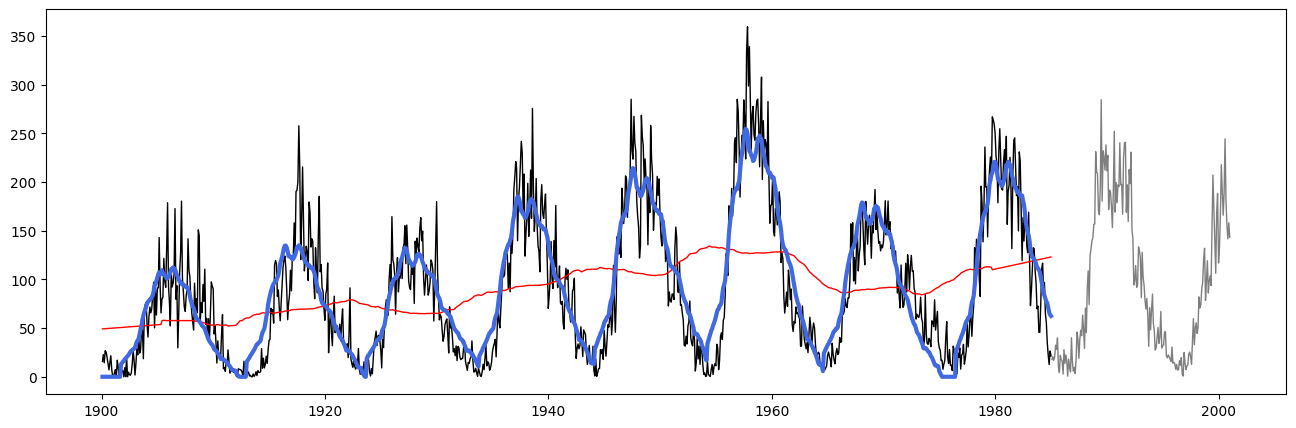

In [94]:
plt.figure(figsize=(16, 5))
plt.plot(y_hist, 'k', label='data', linewidth=1)
plt.plot(trend, label='trend', color='red', linewidth=1)
plt.plot(season_and_trend, label='trend & seasonal', color='royalblue', linewidth=3)
plt.plot(y_future, 'k', alpha=0.5, linewidth=1)

## Model residue

In [95]:
residue = y_hist - season_and_trend

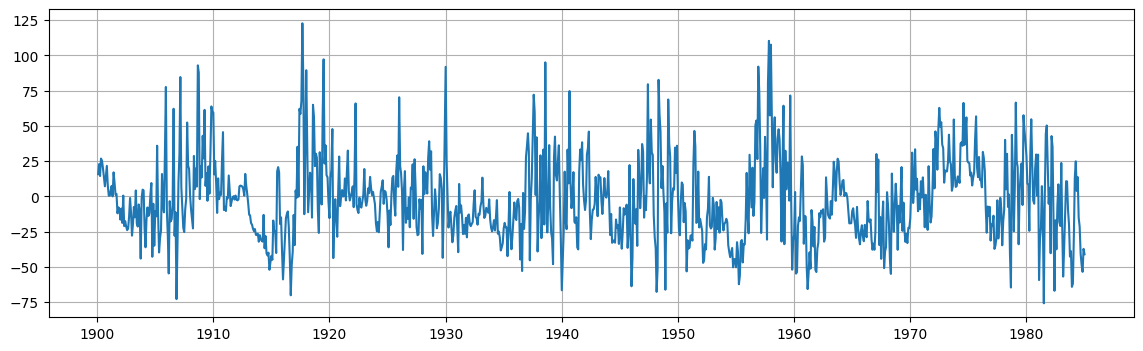

In [96]:
plt.figure(figsize=(14, 4))
plt.plot(residue)
plt.grid()

## Size of the residue

In [97]:
MAEm = np.abs(residue).mean()
RMSEm = np.sqrt(np.square(residue).mean())
MAEm, RMSEm

(22.726359088053904, 29.218041541672683)

## Stationarity of the residue

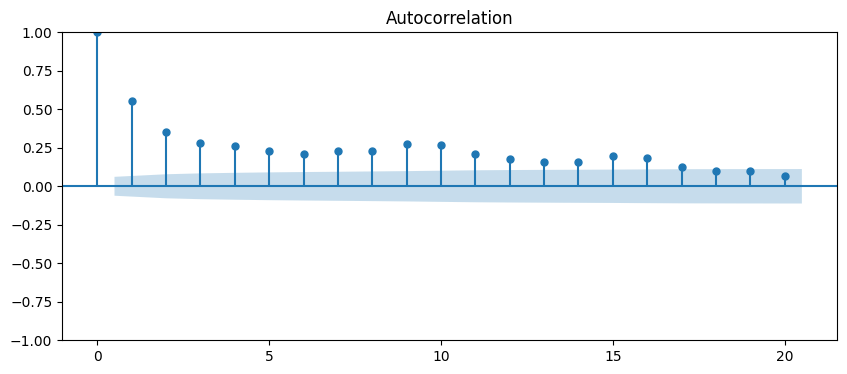

In [99]:
_, ax = plt.subplots(figsize=(10, 4))
tsaplots.plot_acf(residue, lags=20, ax=ax)
plt.show()

This is likely **not stationary**.

## Forecast

In [101]:
yhat_trend = pd.Series(index=y_future.index, data=trend.iloc[-1])

In [106]:
yhat_seasonal = pd.Series(index=y_future.index)
for i in range(len(yhat_seasonal)):
    yhat_seasonal.iloc[i] = seasonal.iloc[-(2 * len(mean_seasonals) - i)]

In [107]:
yhat = 2 * yhat_trend * yhat_seasonal

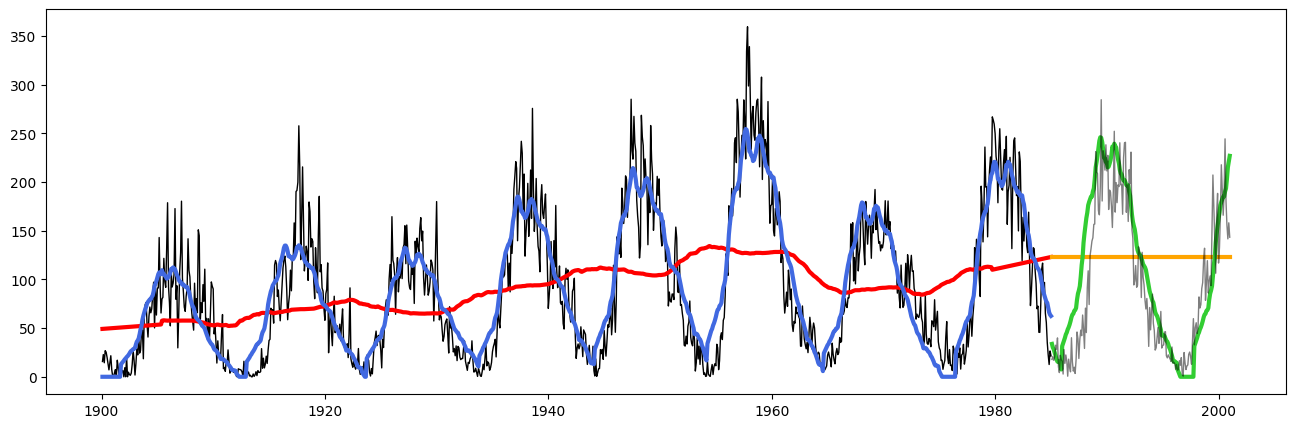

In [108]:
plt.figure(figsize=(16, 5))
plt.plot(y_hist, 'k', label='data', linewidth=1)
plt.plot(trend, label='trend', color='red', linewidth=3)
plt.plot(season_and_trend, label='model', color='royalblue', linewidth=3)
plt.plot(yhat_trend, label='forecast trend', color='orange', linewidth=3)
plt.plot(yhat, label='forecast', color='limegreen', linewidth=3)
plt.plot(y_future, 'k', alpha=0.5, linewidth=1)

## Prediction error

In [109]:
pred_error = y_future - yhat

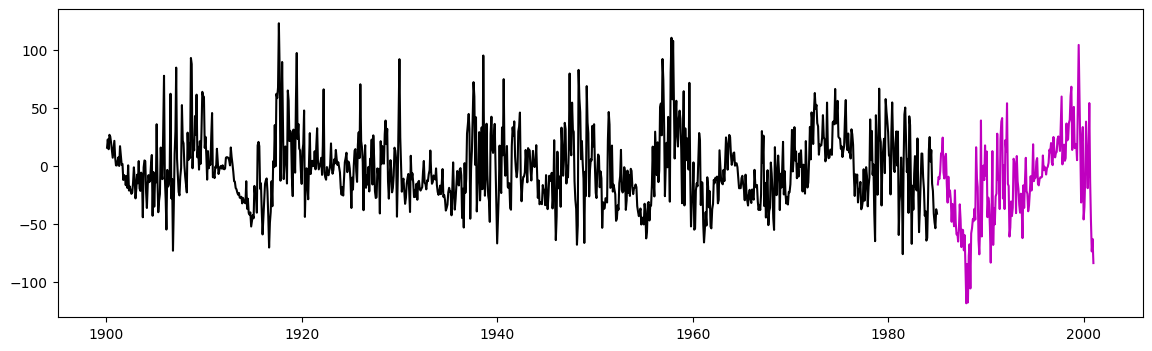

In [110]:
plt.figure(figsize=(14, 4))
plt.plot(residue, 'k')
plt.plot(pred_error, 'm')

## Size of the prediction error

In [111]:
MAEm = np.abs(pred_error).mean()
RMSEm = np.sqrt(np.square(pred_error).mean())
MAEm, RMSEm

(30.579767206745903, 39.0125361972541)

## Applying ARMA

In [113]:
from statsmodels.tsa.arima.model import ARIMA

p = 1
q = 0

arma = ARIMA(residue, order=(p, 0, q)).fit()

/Users/sudeepy/.local/share/virtualenvs/berkeley_ai_ml-A8BYuT1H/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/sudeepy/.local/share/virtualenvs/berkeley_ai_ml-A8BYuT1H/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/sudeepy/.local/share/virtualenvs/berkeley_ai_ml-A8BYuT1H/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [114]:
arma_history = arma.predict()

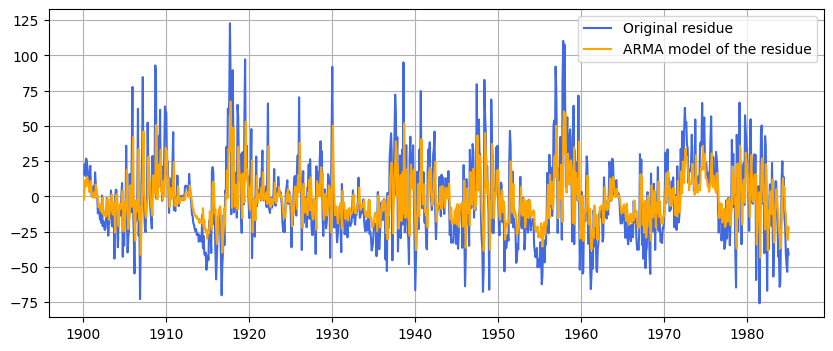

In [125]:
plt.figure(figsize=(10, 4))
plt.plot(residue, color='royalblue', label='Original residue')
plt.plot(arma_history, color='orange', label='ARMA model of the residue')
plt.grid()
plt.legend()

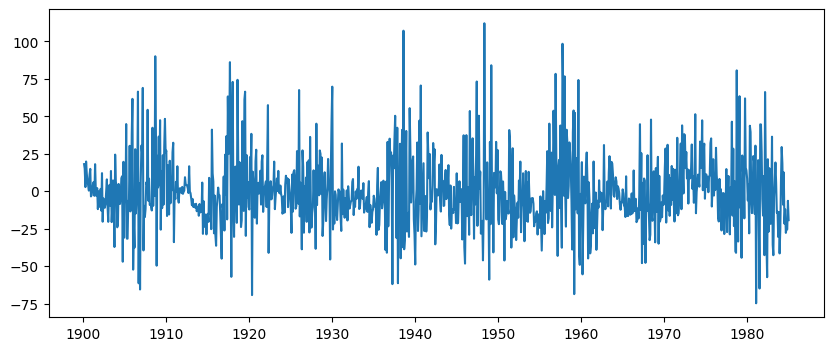

In [131]:
plt.figure(figsize=(10, 4))
plt.plot(residue - arma_history)

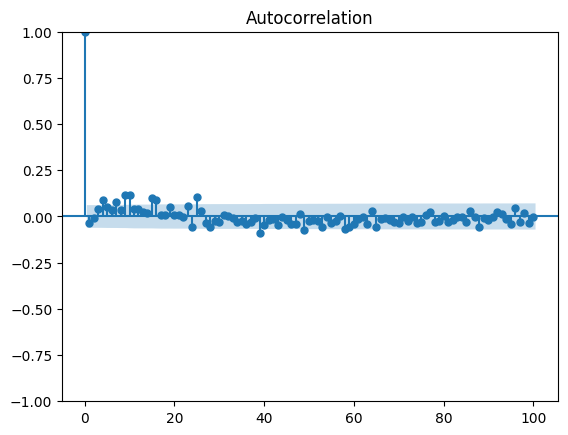

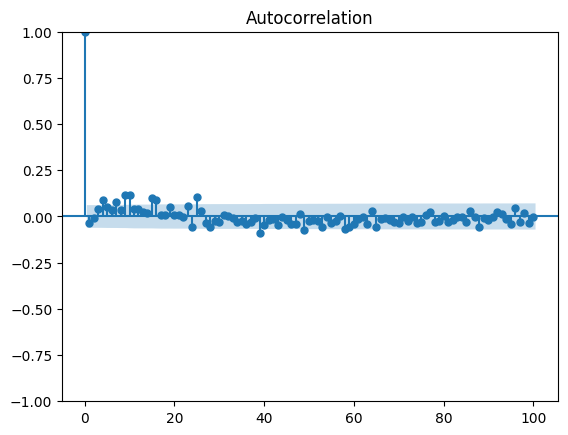

In [133]:
tsaplots.plot_acf(residue - arma_history, lags=100)